In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit.extensions import XGate, IGate

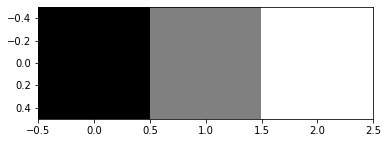

In [2]:
image = np.array([0, 128, 255]).reshape(1,3)
plt.imshow(image, cmap = 'gray')
plt.show()

In [4]:
x = 1
y = 2
q = 8

color = QuantumRegister(q, 'color')
y_ax = QuantumRegister(y, 'y axis')
x_ax = QuantumRegister(x, 'x axis')
classic = ClassicalRegister(x+y+q, 'classic')
qc = QuantumCircuit(color, y_ax, x_ax, classic)

qc.i(color)
qc.h(x_ax)
qc.h(y_ax)
qc.barrier()

#first pixel
qc.i(range(0,qc.num_qubits))
qc.barrier()

#second pixel
qc.x(y_ax)
controls = [x_ax[0], y_ax[1], y_ax[0]]
xg = XGate(None).control(len(controls))
controls.append(0)
qc.append(xg, controls)
qc.x(y_ax)
qc.barrier()

#third pixel
qc.x(x_ax)
qc.x(y_ax[0])
for i in reversed(list(range(color.size))):
    controls = [x_ax[0], y_ax[1], y_ax[0]]
    xg = XGate(None).control(len(controls))
    controls.append(i)
    qc.append(xg, controls)
qc.x(x_ax)
qc.x(y_ax[0])
qc.barrier()

#measure
qc.measure(list(reversed(range(qc.num_qubits))), range(classic.size))

# qc.draw()

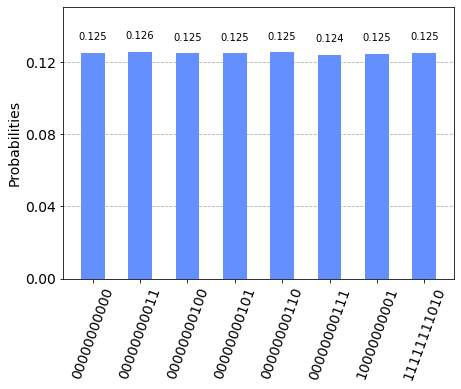

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
plot_histogram(counts_neqr)
plt.show()

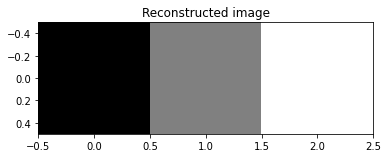

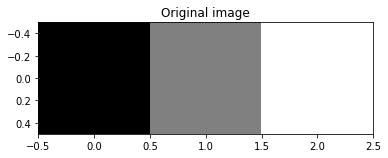

In [6]:
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:color.size], 2), int(item[color.size:],2)))
out_image = np.zeros((len(image.flatten(),)))
for pixel in out_pixels:
    if pixel[1]<out_image.shape[0]:
        out_image[pixel[1]] = pixel[0]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

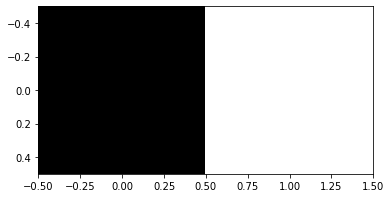

In [7]:
image = np.array([0,1]).reshape(1,2)
color_bit_range = 1
plt.imshow(image, cmap = 'gray')
plt.show()

In [8]:
x = 1
y = 1
q = 1

color = QuantumRegister(q, 'color')
y_ax = QuantumRegister(y, 'y axis')
x_ax = QuantumRegister(x, 'x axis')
classic = ClassicalRegister(x+y+q, 'classic')
qc = QuantumCircuit(color, y_ax, x_ax, classic)

qc.i(color)
qc.h(x_ax)
qc.h(y_ax)
qc.barrier()

#first pixel
qc.i(range(0,qc.num_qubits))
qc.barrier()

#second pixel
qc.x(y_ax)
qc.ccx(x_ax[0], y_ax[0], color[0])
qc.x(y_ax)
qc.barrier()

#measure
qc.measure(list(reversed(range(qc.num_qubits))), range(classic.size))

qc.draw()

┌───┐ ░ ┌───┐ ░      ┌───┐      ░       ┌─┐
  color_0: ┤ I ├─░─┤ I ├─░──────┤ X ├──────░───────┤M├
           ├───┤ ░ ├───┤ ░ ┌───┐└─┬─┘┌───┐ ░    ┌─┐└╥┘
 y axis_0: ┤ H ├─░─┤ I ├─░─┤ X ├──■──┤ X ├─░────┤M├─╫─
           ├───┤ ░ ├───┤ ░ └───┘  │  └───┘ ░ ┌─┐└╥┘ ║ 
 x axis_0: ┤ H ├─░─┤ I ├─░────────■────────░─┤M├─╫──╫─
           └───┘ ░ └───┘ ░                 ░ └╥┘ ║  ║ 
classic: 3/═══════════════════════════════════╩══╩══╩═
                                              0  1  2

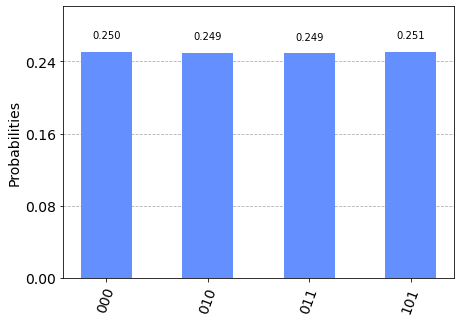

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
plot_histogram(counts_neqr)
plt.show()

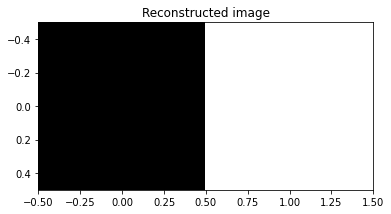

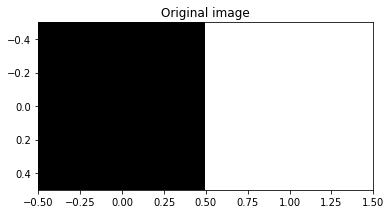

In [10]:
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:color.size], 2), int(item[color.size:],2)))
out_image = np.zeros((len(image.flatten(),)))
for pixel in out_pixels:
    if pixel[1]<out_image.shape[0]:
        out_image[pixel[1]] = pixel[0]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

# Rescaling (https://link.springer.com/content/pdf/10.1007/s11128-015-1099-5.pdf)

In [13]:
import math
ry = 5
rx = 3
h_prime = int(np.ceil(math.log(ry*image.shape[0],2)))
w_prime = int(np.ceil(math.log(rx*image.shape[1],2)))
print(h_prime, w_prime)
h = int(np.ceil(math.log(image.shape[0],2)))
if not h: h = 1
w = int(np.ceil(math.log(image.shape[1],2)))
print('from {} to {}'.format((image.shape),(image.shape[0]*ry, image.shape[1]*rx)))
print('for each 1x1 pixel shape is {}x{}'.format(ry, rx))

3 3
from (1, 2) to (5, 6)
for each 1x1 pixel shape is 5x3


In [14]:
indx = QuantumRegister(h+w, 'idx')
indx_prime = QuantumRegister(h_prime+w_prime, 'idx_prime')
intensity = QuantumRegister(color_bit_range,'intensity')
intensity_prime = QuantumRegister(color_bit_range,'intensity_prime')
cr = ClassicalRegister(intensity_prime.size + indx_prime.size, 'cr')
qc_image = QuantumCircuit(intensity, indx, intensity_prime, indx_prime, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()

#how many bits is used for coding classical position? h and w
    
for idx in range(indx_prime.size):
    qc_image.h(indx.size + intensity.size + intensity_prime.size + idx)
  
qc_image.barrier()
    
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(color_bit_range)
    for j, intens in enumerate(pixel_bin):
        if not int(intens):
            qc_image.x(intensity[j])
    position_bin = "{0:b}".format(i).zfill(h+w)
    for j, coord in enumerate(position_bin):
        if not int(coord):
            qc_image.x(indx[j])
                        
    for x_pos in range(ry):
        for y_pos in range(rx*(i), rx*(1+i)):
            x_pos_bit = "{0:b}".format(x_pos).zfill(h_prime)
            for j, coord in enumerate(x_pos_bit):
                if not int(coord):
                    qc_image.x(indx_prime[j])
            y_pos_bit = "{0:b}".format(y_pos).zfill(w_prime)
            for j, coord in enumerate(y_pos_bit):
                if not int(coord):
                    qc_image.x(indx_prime[h_prime+j])
            controls = list(range(intensity.size+indx.size))
            controls.extend(list(range(intensity.size+indx.size+1, num_qubits)))
            xg = XGate(None).control(len(controls))
            controls.append(indx.size + intensity.size)
            qc_image.append(xg, controls)
            
            for j, coord in enumerate(x_pos_bit):
                if not int(coord):
                    qc_image.x(indx_prime[j])
            for j, coord in enumerate(y_pos_bit):
                if not int(coord):
                    qc_image.x(indx_prime[h_prime+j])
            qc_image.barrier()
    
    for j, intens in enumerate(pixel_bin):
        if not int(intens):
            qc_image.x(intensity[j])
    for j, coord in enumerate(position_bin):
        if not int(coord):
            qc_image.x(indx[j])     
    
    qc_image.barrier()
    
qc_image.measure(list(reversed(range(intensity.size+indx.size, intensity.size+indx.size+intensity_prime.size+indx_prime.size))),
                 range(intensity_prime.size+indx_prime.size))
# qc_image.draw()

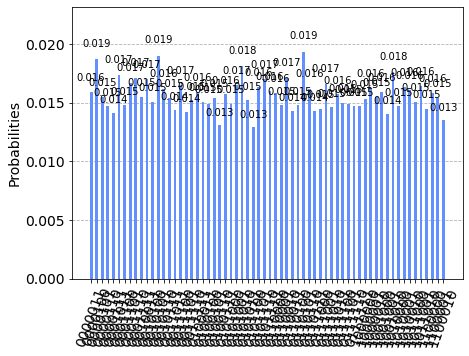

{'1001000': 159, '0111001': 166, '0101110': 170, '0110010': 171, '0000101': 155, '1100001': 154, '0011101': 142, '0100101': 154, '0111011': 157, '0001110': 171, '0100111': 157, '1001010': 176, '1100000': 158, '0011110': 152, '1011010': 145, '0110110': 162, '0101010': 181, '0010101': 190, '1011001': 164, '0001011': 174, '0111110': 147, '1100010': 135, '0000111': 141, '1000001': 162, '0110000': 158, '0101101': 163, '0000100': 187, '0110011': 143, '1000010': 155, '0010111': 154, '0111100': 150, '0001101': 167, '0100100': 149, '0010011': 170, '0110001': 148, '0000110': 147, '0101111': 160, '1000000': 153, '0001111': 155, '0100110': 131, '0111010': 146, '0111111': 147, '1001001': 140, '0111000': 145, '0100011': 151, '0001100': 148, '0111101': 149, '0110100': 148, '0101100': 129, '0000011': 159, '0101011': 152, '0110101': 193, '1011000': 151, '0010100': 151, '0110111': 143, '0011011': 144, '0010110': 162, '0011100': 165, '0101000': 149, '0101001': 165, '1010001': 163, '0011111': 159, '101001

In [15]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=10000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
plot_histogram(counts_neqr)
plt.show()
print(counts_neqr)

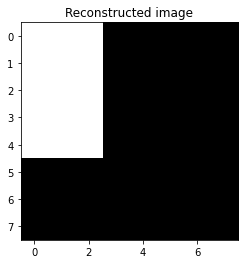

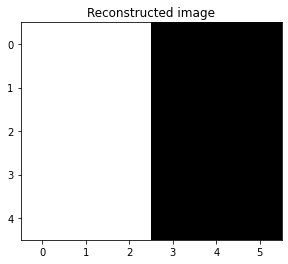

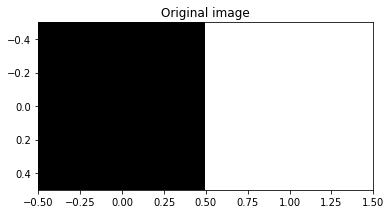

[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


In [16]:
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:color.size], 2), int(item[color.size:],2)))
out_image = np.zeros((64,))
for pixel in out_pixels:
    if pixel[1]<out_image.shape[0]:
        out_image[pixel[1]] = pixel[0]
out_image = np.reshape(out_image, (8,8))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
out_image = out_image[0:5, 0:6]
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()
print(out_image)

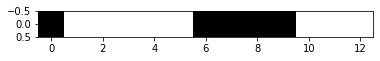

In [17]:
image = np.array([0,1,1,1,1,1,0,0,0,0,1,1,1]).reshape(1,13)
color_bit_range = 1
plt.imshow(image, cmap = 'gray')
plt.show()

In [18]:
import math
ry = 3
rx = 5
h_prime = int(np.ceil(math.log(ry*image.shape[0],2)))
w_prime = int(np.ceil(math.log(rx*image.shape[1],2)))
print(h_prime, w_prime)
h = int(np.ceil(math.log(image.shape[0],2)))
if not h: h = 1
w = int(np.ceil(math.log(image.shape[1],2)))
print('from {} to {}'.format((image.shape),(image.shape[0]*ry, image.shape[1]*rx)))
print('for each 1x1 pixel shape is {}x{}'.format(ry, rx))

2 7
from (1, 13) to (3, 65)
for each 1x1 pixel shape is 3x5


In [23]:
indx = QuantumRegister(h+w, 'idx')
indx_prime = QuantumRegister(h_prime+w_prime, 'idx_prime')
intensity = QuantumRegister(color_bit_range,'intensity')
intensity_prime = QuantumRegister(color_bit_range,'intensity_prime')
cr = ClassicalRegister(intensity_prime.size + indx_prime.size, 'cr')
qc_image = QuantumCircuit(intensity, indx, intensity_prime, indx_prime, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()

#how many bits is used for coding classical position? h and w

for idx in range(indx.size + intensity.size + intensity_prime.size):
    qc_image.i(idx)
for idx in range(indx_prime.size):
    qc_image.h(indx.size + intensity.size + intensity_prime.size + idx)
  
qc_image.barrier()
    
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(color_bit_range)
    if pixel_bin!='0':
        for j, intens in enumerate(pixel_bin):
            if not int(intens):
                qc_image.x(intensity[j])
        position_bin = "{0:b}".format(i).zfill(h+w)
        for j, coord in enumerate(position_bin):
            if not int(coord):
                qc_image.x(indx[j])

        for x_pos in range(ry):
            for y_pos in range(rx*(i), rx*(1+i)):
                x_pos_bit = "{0:b}".format(x_pos).zfill(h_prime)
                for j, coord in enumerate(x_pos_bit):
                    if not int(coord):
                        qc_image.x(indx_prime[j])
                y_pos_bit = "{0:b}".format(y_pos).zfill(w_prime)
                for j, coord in enumerate(y_pos_bit):
                    if not int(coord):
                        qc_image.x(indx_prime[h_prime+j])
                        
                qc_image.cx(intensity, intensity_prime)
                controls = list(range(intensity_prime.size+indx.size+1,
                                      intensity_prime.size+indx.size+1+indx_prime.size))
                xg = XGate(None).control(len(controls))
                controls.append(intensity_prime)
                qc_image.append(xg, controls)

                for j, coord in enumerate(x_pos_bit):
                    if not int(coord):
                        qc_image.x(indx_prime[j])
                for j, coord in enumerate(y_pos_bit):
                    if not int(coord):
                        qc_image.x(indx_prime[h_prime+j])
                qc_image.barrier()

        for j, intens in enumerate(pixel_bin):
            if not int(intens):
                qc_image.x(intensity[j])
        for j, coord in enumerate(position_bin):
            if not int(coord):
                qc_image.x(indx[j])     

        qc_image.barrier()
    
qc_image.measure(list(reversed(range(intensity.size+indx.size, intensity.size+indx.size+intensity_prime.size+indx_prime.size))),
                 range(intensity_prime.size+indx_prime.size))
# qc_image.draw()

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()

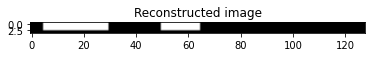

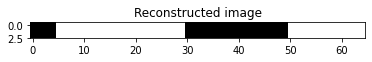

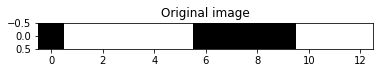

In [25]:
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:color.size], 2), int(item[color.size:],2)))
out_image = np.zeros((len(counts_neqr),))
for pixel in out_pixels:
    if pixel[1]<out_image.shape[0]:
        out_image[pixel[1]] = pixel[0]
out_image = np.reshape(out_image, (2**h_prime,2**w_prime))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()

out_image = out_image[0:image.shape[0]*ry, 0:image.shape[1]*rx]
# out_image = out_image.reshape((14, 10))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image.reshape(1,13), cmap = 'gray')
plt.title('Original image')
plt.show()
# print(out_image)

# From image

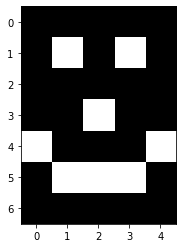

In [33]:
image = np.array([0,0,0,0,0,
                  0,1,0,1,0,
                  0,0,0,0,0,
                  0,0,1,0,0,
                  1,0,0,0,1,
                  0,1,1,1,0,
                  0,0,0,0,0,]).reshape(7,5)
# image = np.array([1,0,
#                   0,1]).reshape(2,2)
color_bit_range = 1
plt.imshow(image, cmap = 'gray')
plt.show()

In [34]:
ry = 2
rx = 2
h_prime = int(np.ceil(math.log(ry*image.shape[0],2)))
w_prime = int(np.ceil(math.log(rx*image.shape[1],2)))
if not h_prime: h_prime = 1
if not w_prime: w_prime = 1
print(h_prime, w_prime)
h = int(np.ceil(math.log(image.shape[0],2)))
if not h: h = 1
w = int(np.ceil(math.log(image.shape[1],2)))
if not w: w = 1
print('from {} to {}'.format((image.shape),(image.shape[0]*ry, image.shape[1]*rx)))
print('for each 1x1 pixel shape is {}x{}'.format(ry, rx))

4 4
from (7, 5) to (14, 10)
for each 1x1 pixel shape is 2x2


In [37]:
x_indx = QuantumRegister(h, 'x_idx')
y_indx = QuantumRegister(w, 'y_idx')
x_prime = QuantumRegister(h_prime, 'x_idx_prime')
y_prime = QuantumRegister(h_prime, 'y_idx_prime')

intensity = QuantumRegister(color_bit_range,'intensity')
intensity_prime = QuantumRegister(color_bit_range,'intensity_prime')

cr = ClassicalRegister(intensity_prime.size + x_prime.size + y_prime.size, 'cr')
# cr = ClassicalRegister(h+w+color_bit_range, 'cr')
qc_image = QuantumCircuit(intensity, x_indx, y_indx, intensity_prime, x_prime, y_prime, cr)
num_qubits = qc_image.num_qubits

#how many bits is used for coding classical position? h and w

qc_image.i(intensity)
qc_image.i(x_indx)
qc_image.i(y_indx)
qc_image.i(intensity_prime)
qc_image.h(x_prime)
qc_image.h(y_prime)
qc_image.barrier()
    
for i in range(image.shape[0]):
    i_qbit = "{0:b}".format(i).zfill(h)
    for x_in_iter, xpos in enumerate(i_qbit):
        if xpos!='1': qc_image.x(x_indx[x_in_iter])
    for j in range(image.shape[1]):
        j_qbit = "{0:b}".format(j).zfill(w)
        for y_in_iter, ypos in enumerate(j_qbit):
            if ypos!='1': qc_image.x(y_indx[y_in_iter])
        pixel = image[i,j]
        if pixel:
            qc_image.x(intensity)
        for i_en in range(i*ry,(i+1)*ry):
            for j_en in range(j*rx,(j+1)*rx): 
                
                i_qbit_en = "{0:b}".format(i_en).zfill(h_prime)
                for x_out_iter, xpos in enumerate(i_qbit_en):
                    if xpos!='1':qc_image.x(x_prime[x_out_iter])
                qc_image.barrier() 
                
                j_qbit_en = "{0:b}".format(j_en).zfill(w_prime)
                for y_out_iter, ypos in enumerate(j_qbit_en):
                    if ypos!='1': qc_image.x(y_prime[y_out_iter])
                    
                qc_image.barrier() 
                                
                controls = list(range(intensity.size + x_indx.size + y_indx.size + intensity_prime.size, num_qubits))
                controls.append(0)
                xg = XGate(None).control(len(controls))
                controls.append(intensity_prime)
                qc_image.append(xg, controls)
                
                qc_image.barrier() 
                
                for y_out_iter, ypos in enumerate(j_qbit_en):
                    if ypos!='1': qc_image.x(y_prime[y_out_iter])
                    
                qc_image.barrier() 
                
                for x_out_iter, xpos in enumerate(i_qbit_en):
                    if xpos!='1': qc_image.x(x_prime[x_out_iter])

                qc_image.barrier() 
                
        if pixel:
            qc_image.x(intensity)
        
        for y_in_iter, ypos in enumerate(j_qbit):
            if ypos!='1': qc_image.x(y_indx[y_in_iter])
            
    for x_in_iter, xpos in enumerate(i_qbit):
        if xpos!='1': qc_image.x(x_indx[x_in_iter])
            

qc_image.measure(list(reversed(range(intensity.size+x_indx.size+y_indx.size, num_qubits))),
                 list(range(intensity_prime.size+x_prime.size+y_prime.size)))
# qc_image.draw()

In [38]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
# print(counts_neqr)

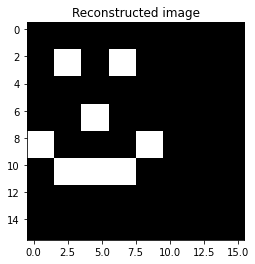

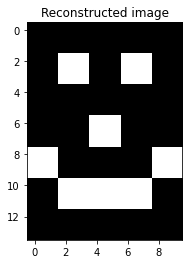

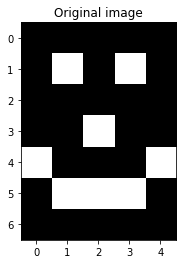

In [39]:
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:color.size], 2), int(item[color.size:],2)))
out_image = np.zeros((len(counts_neqr),))
for pixel in out_pixels:
    if pixel[1]<out_image.shape[0]:
        out_image[pixel[1]] = pixel[0]
out_image = np.reshape(out_image, (2**h_prime,2**w_prime))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()

out_image = out_image[0:image.shape[0]*ry, 0:image.shape[1]*rx]
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()
# print(out_image)